In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import networkx as nx
import torch
import pandas as pd
from scipy import linalg
from networkx.algorithms.community import quality
from networkx.algorithms import community, centrality
import random
from random import sample

https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.036104

A network of coauthorships between 379 scientists whose research centers on the properties of networks of one kind or another. Vertex diameters indicate the community centrality, and the ten vertices with highest centralities are highlighted. For those readers curious about the identities of the vertices, an annotated version of this figure, names and all, can be found in Ref. 84 Inset: a scatter plot of community centrality against vertex degrees. Like most centrality measures, this one is correlated with degree, though only moderately strongly.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = nx.read_gml('/content/drive/My Drive/netscience.gml')

#data.nodes
#data.edges

Mounted at /content/drive


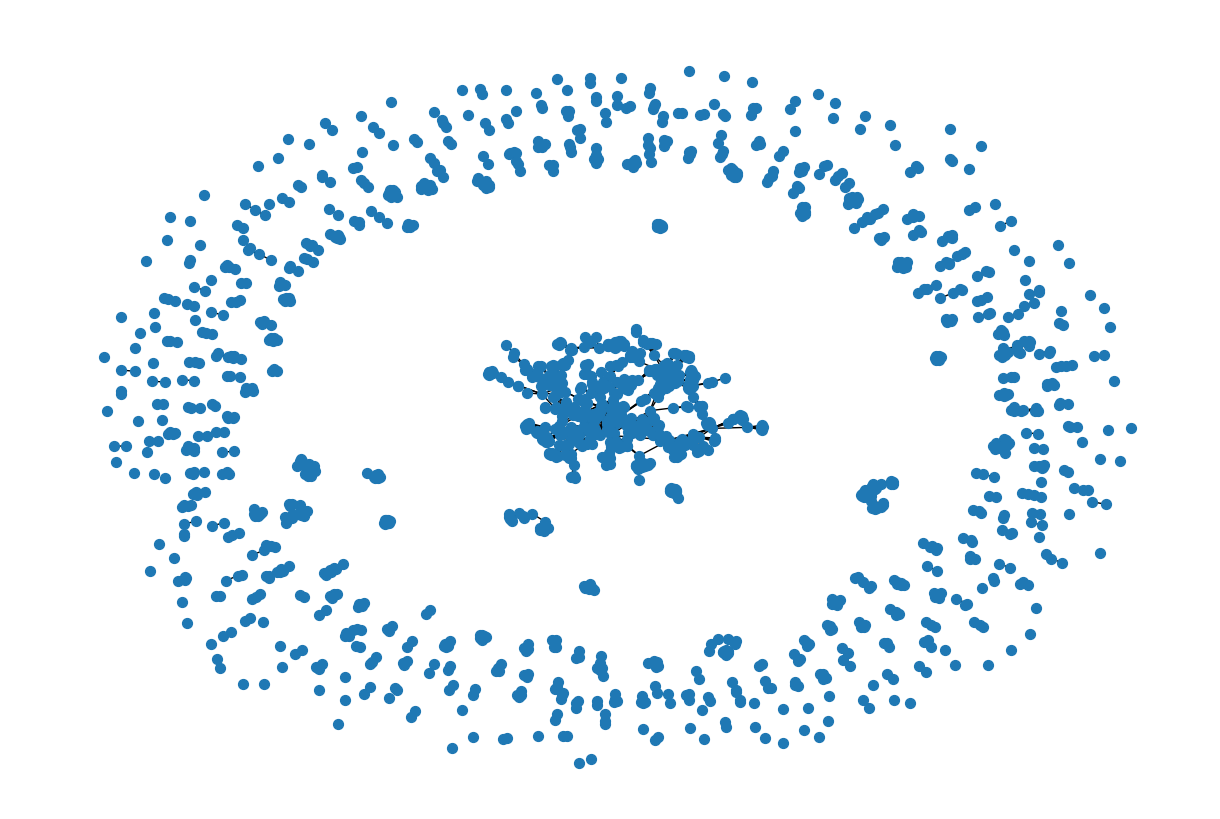

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'data' has 'edges' and 'nodes' attributes
edges = data.edges  #  list of edges
nodes = data.nodes  #  list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Plot the graph (optional)
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_size=50, cmap=plt.cm.jet)


# Draw node labels and change font size
node_labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, "type")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()



Number of communities: 397
Modularity: 0.9297820700867823


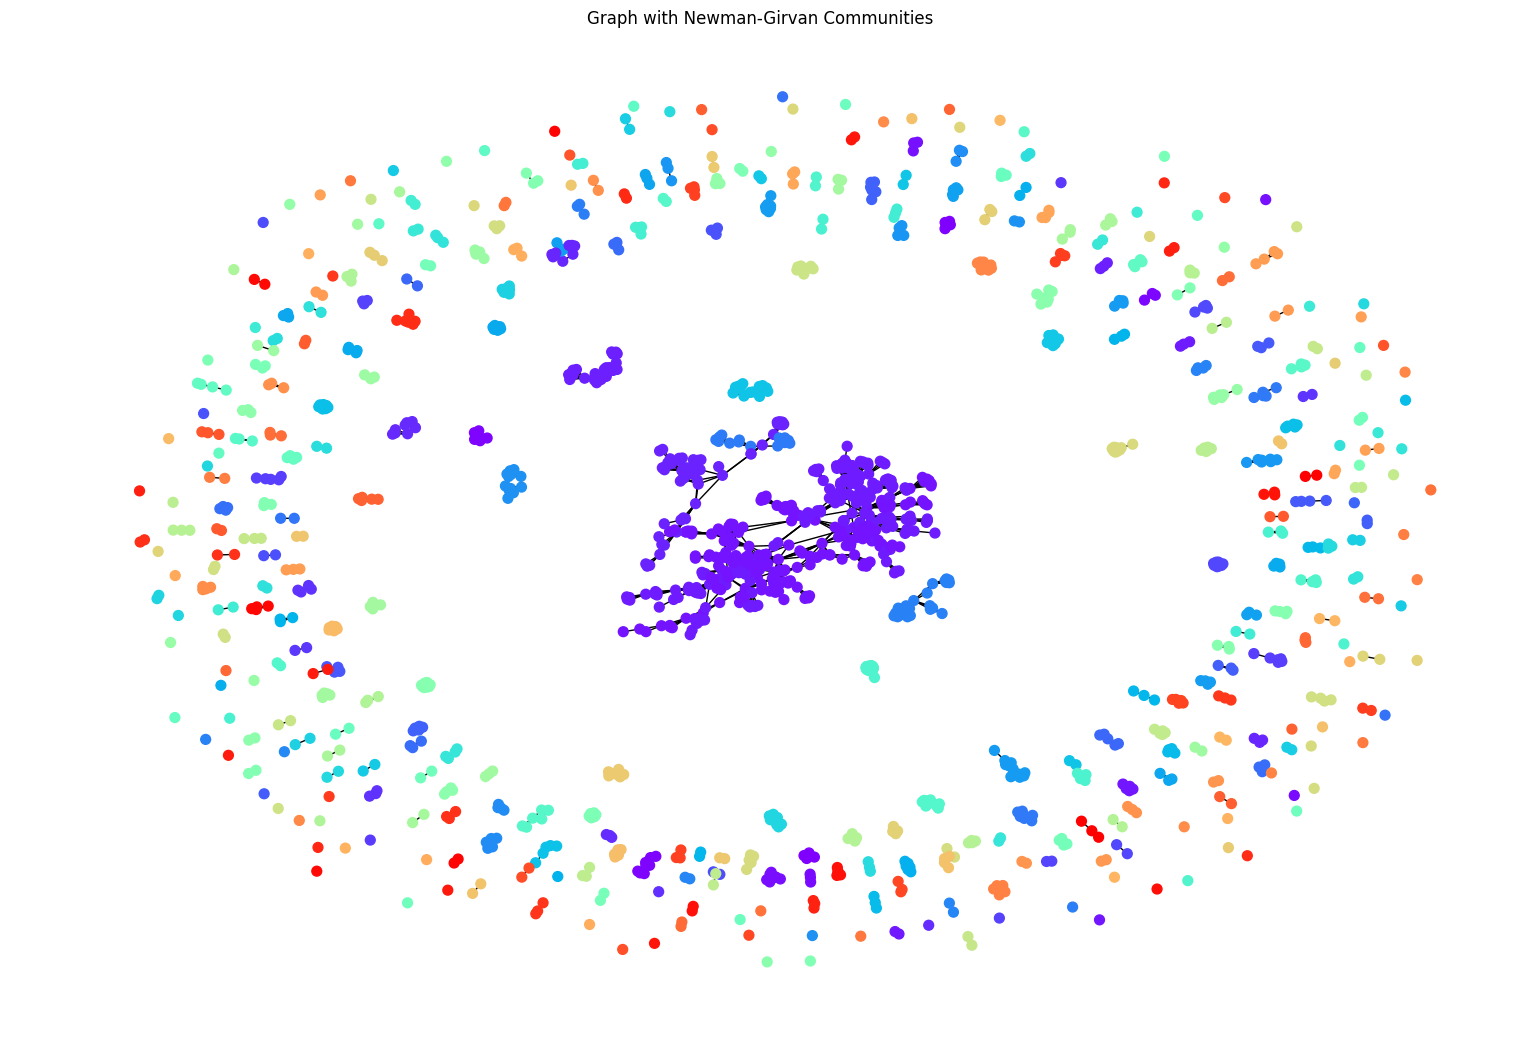

In [6]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.colors as mcolors

# Defining 'data' 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Find community structures using Newman-Girvan algorithm
communities_generator = community.girvan_newman(G)

# Get the top-level communities
top_level_communities = next(communities_generator)


# Count the number of communities
num_communities = len(top_level_communities)

# Print or use the number of communities as needed
print("Number of communities:", num_communities)

# Print the communities
# for i, community_set in enumerate(top_level_communities):
#     print(f"Community {i + 1}: {community_set}")

# Calculate modularity
modularity = community.quality.modularity(G, top_level_communities)
print("Modularity:", modularity)

# Create a color map for communities
color_map = {}
for i, nodes_in_community in enumerate(top_level_communities):
    for node in nodes_in_community:
        color_map[node] = i

# Get unique community colors
unique_colors = sorted(set(color_map.values()))

# Visualize the graph with communities
pos = nx.spring_layout(G)  # You can use a different layout if needed
plt.figure(figsize=(15, 10))
node_colors = [color_map[node] for node in G.nodes()]
nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, cmap=plt.cm.rainbow)

# Create a color bar for communities
#norm = mcolors.Normalize(vmin=min(unique_colors), vmax=max(unique_colors))
#sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=norm)
#sm.set_array([])  # empty array for the data range
#cbar = plt.colorbar(sm, ticks=unique_colors, shrink=0.7)
#cbar.set_label('Communities')

# Show the plot
plt.title("Graph with Newman-Girvan Communities")
plt.show()


In [8]:
import networkx as nx
import matplotlib.pyplot as plt


# Defining 'data' 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Calculate Node Degree
node_degrees = dict(G.degree())

# Calculate Network Density
density = nx.density(G)

# Calculate Clustering Coefficient
clustering_coefficient = nx.average_clustering(G)

# Print the results
print("Node Degrees:", node_degrees)
print("Network Density:", density)
print("Clustering Coefficient:", clustering_coefficient)



Node Degrees: {'ABRAMSON, G': 2, 'KUPERMAN, M': 3, 'ACEBRON, J': 4, 'BONILLA, L': 4, 'PEREZVICENTE, C': 4, 'RITORT, F': 4, 'SPIGLER, R': 4, 'ADAMIC, L': 4, 'ADAR, E': 1, 'HUBERMAN, B': 6, 'LUKOSE, R': 3, 'PUNIYANI, A': 3, 'AERTSEN, A': 7, 'GERSTEIN, G': 3, 'HABIB, M': 3, 'PALM, G': 3, 'AFRAIMOVICH, V': 2, 'VERICHEV, N': 2, 'RABINOVICH, M': 2, 'AGRAWAL, H': 0, 'AHUJA, R': 2, 'MAGNANTI, T': 2, 'ORLIN, J': 2, 'AIELLO, W': 2, 'CHUNG, F': 5, 'LU, L': 5, 'ALBA, R': 0, 'ALBERICH, R': 2, 'MIROJULIA, J': 2, 'ROSSELLO, F': 2, 'ALBERT, R': 10, 'ALBERT, I': 2, 'NAKARADO, G': 2, 'BARABASI, A': 34, 'JEONG, H': 27, 'ALBERTS, B': 5, 'BRAY, D': 5, 'LEWIS, J': 5, 'RAFF, M': 5, 'ROBERTS, K': 5, 'WATSON, J': 5, 'ALDANA, M': 0, 'ALDOUS, D': 1, 'PITTEL, B': 1, 'ALEKSIEJUK, A': 2, 'HOLYST, J': 6, 'STAUFFER, D': 12, 'ALLARIA, E': 3, 'ARECCHI, F': 6, 'DIGARBO, A': 3, 'MEUCCI, R': 3, 'ALMAAS, E': 9, 'KOVACS, B': 4, 'VICSEK, T': 16, 'OLTVAI, Z': 21, 'KRAPIVSKY, P': 9, 'REDNER, S': 8, 'KULKARNI, R': 3, 'STROUD, D

The network density you provided is approximately 0.0022, which is a measure of how many edges exist in the network relative to the total possible number of edges. A low network density suggests that the network is relatively sparse, meaning there are fewer connections between nodes compared to the total possible connections.

The clustering coefficient is approximately 0.6378. The clustering coefficient measures the degree to which nodes in a network tend to cluster together. A high clustering coefficient indicates that nodes in the network are more likely to form clusters or groups. In this case, a clustering coefficient of 0.6378 suggests a relatively high level of clustering in the network.

Both measures provide insights into the structure of the network. The low density suggests a sparse network, while the high clustering coefficient suggests that nodes are more interconnected, forming clusters or groups. Together, these measures offer a glimpse into the overall connectivity and organization of the network.








In [9]:
import networkx as nx

# Defining 'data' 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)


# Add edges representing collaborations between authors

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Identify influential authors based on the centrality measures
influential_authors_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
influential_authors_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
influential_authors_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

print("Top authors by degree centrality:", influential_authors_degree)
print("Top authors by betweenness centrality:", influential_authors_betweenness)
print("Top authors by eigenvector centrality:", influential_authors_eigenvector)


Top authors by degree centrality: ['BARABASI, A', 'JEONG, H', 'NEWMAN, M', 'OLTVAI, Z', 'YOUNG, M']
Top authors by betweenness centrality: ['NEWMAN, M', 'PASTORSATORRAS, R', 'MORENO, Y', 'SOLE, R', 'BOCCALETTI, S']
Top authors by eigenvector centrality: ['UETZ, P', 'CAGNEY, G', 'MANSFIELD, T', 'GIOT, L', 'JUDSON, R']


Degree centrality measures how many connections a node (author) has in the network.
In a collaboration network, it would represent the number of collaborations an author has.
To compute degree centrality for each author:
Count the number of collaborations each author has (number of edges connected to the node).


Betweenness centrality identifies authors that act as bridges between other authors in the network.
It quantifies how often a node appears on the shortest paths between pairs of other nodes.
To compute betweenness centrality for each author:
Find the shortest paths between all pairs of authors.
Count the number of times each author appears on these shortest paths.


Eigenvector centrality measures the importance of a node in the network, considering the importance of its neighbors.
An author connected to other well-connected authors will have a higher eigenvector centrality.
To compute eigenvector centrality for each author:
Formulate the network's adjacency matrix.
Use an iterative algorithm (e.g., power iteration) to find the eigenvector corresponding to the largest eigenvalue.
The resulting eigenvector contains centrality scores for each author.

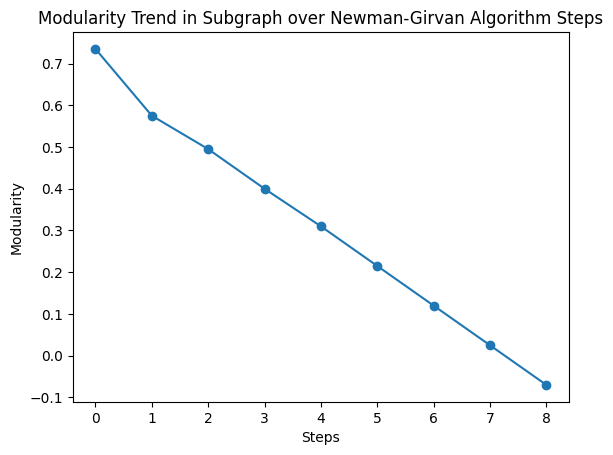

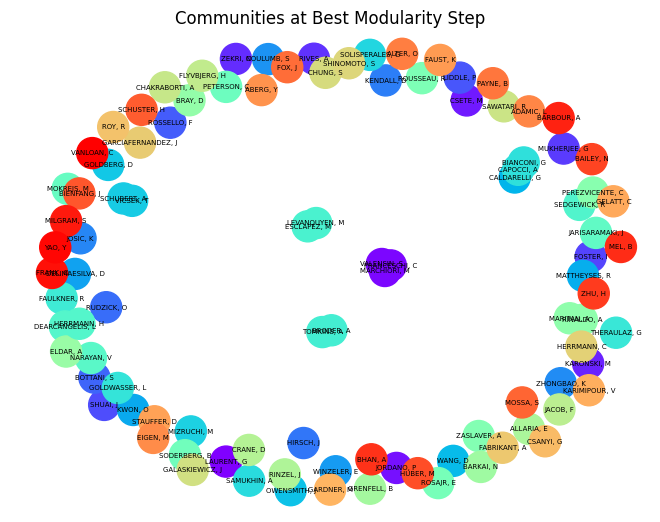

In [32]:
import networkx as nx
import networkx.algorithms.community as community
import networkx.algorithms.community.quality as quality
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity




# Defining 'data' 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Get the list of nodes
all_nodes = list(data.nodes)

# Set the size of the subset you want
subset_size = 100  # Adjust as needed

# Randomly sample nodes
subset_nodes = random.sample(all_nodes, subset_size)

# Create a subgraph using only the subset of nodes
subgraph = data.subgraph(subset_nodes)

# Reinitialize G with the subgraph
G = nx.Graph(subgraph)


# Find community structures using the Girvan-Newman algorithm
communities_generator = girvan_newman(G)

# Initialize variables to store modularity values and community structures
modularity_values = []
community_structures = []

# Iterate over Girvan-Newman steps
for communities in communities_generator:
    # Convert community structure to a list of sets
    communities_list = [set(community) for community in communities]

    # Calculate modularity
    modularity_value = modularity(G, communities_list)

    # Store modularity and community structure
    modularity_values.append(modularity_value)
    community_structures.append(communities_list)

# Plot modularity trend
plt.plot(modularity_values, marker='o')
plt.xlabel('Steps')
plt.ylabel('Modularity')
plt.title('Modularity Trend in Subgraph over Newman-Girvan Algorithm Steps')
plt.show()

# Choose the step with the highest modularity
best_step = modularity_values.index(max(modularity_values))
best_communities = community_structures[best_step]

# Create a color map for communities at the best step
color_map = {}
for i, nodes_in_community in enumerate(best_communities):
    for node in nodes_in_community:
        color_map[node] = i

# Visualize the communities with colors
pos = nx.spring_layout(G)
colors = [color_map[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=500,font_size=5, cmap=plt.cm.rainbow)
plt.title('Communities at Best Modularity Step')
plt.show()






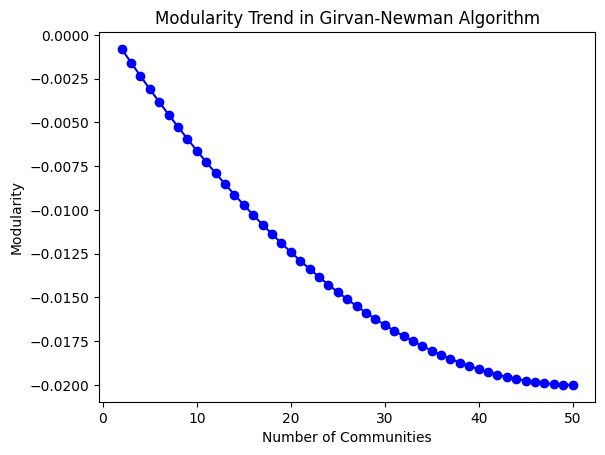

In [20]:
#Modularity

import networkx as nx
import matplotlib.pyplot as plt
import random
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

#data
scientists = list(data.nodes)

# Choose a random subset of scientists for visualization
num_scientists_to_visualize = min(50, len(scientists))
selected_scientists = random.sample(scientists, num_scientists_to_visualize)

# Create a fully connected graph for the selected scientists
G = nx.complete_graph(len(selected_scientists))

# Set node names
mapping = {i: scientist for i, scientist in enumerate(selected_scientists)}
G = nx.relabel_nodes(G, mapping)

# Apply Girvan-Newman algorithm
communities_generator = community.girvan_newman(G)

# Lists to store data for plotting
modularity_values = []
num_communities = []

# Iterate over Girvan-Newman steps
for communities in communities_generator:
    # Calculate modularity
    modularity = quality.modularity(G, communities)

    # Store data for plotting
    modularity_values.append(modularity)
    num_communities.append(len(communities))

# Plot modularity trend
plt.plot(num_communities, modularity_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Communities')
plt.ylabel('Modularity')
plt.title('Modularity Trend in Girvan-Newman Algorithm')
plt.show()


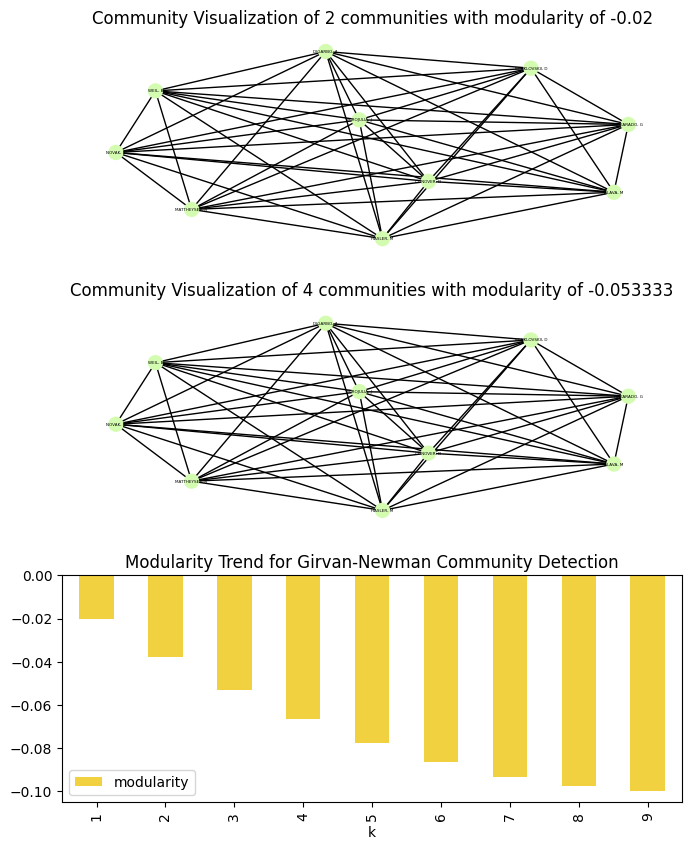

In [ ]:
#Modularity
scientists = list(data.nodes)
# Choose a random subset of scientists for visualization
num_scientists_to_visualize = min(50, len(scientists))  # Adjust this based on your preference
selected_scientists = random.sample(scientists, num_scientists_to_visualize)

# Create a fully connected graph for the selected scientists
G = nx.complete_graph(len(selected_scientists))

# # Set node names
mapping = {i: scientist for i, scientist in enumerate(selected_scientists)}
G = nx.relabel_nodes(G, mapping)

# Apply Newman-Girvan algorithm
communities = list(nx.community.girvan_newman(G))

# Get the final communities
level = 3
final_communities = list(communities)[-1]

# Create a mapping of node to community
community_map = {node: idx for idx, nodes in enumerate(final_communities) for node in nodes}

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8", ][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                # Use modulo to ensure index is within the valid range
                node_colors.append(colors[current_community_index % len(colors)])
                break
            current_community_index += 1
    return node_colors



# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=100,
        node_color=node_colors,
        with_labels=True,
        font_size=3,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(8, 10))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1) #communities at the first level
visualize_communities(G, communities[2], 2) #communities at the third level

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()


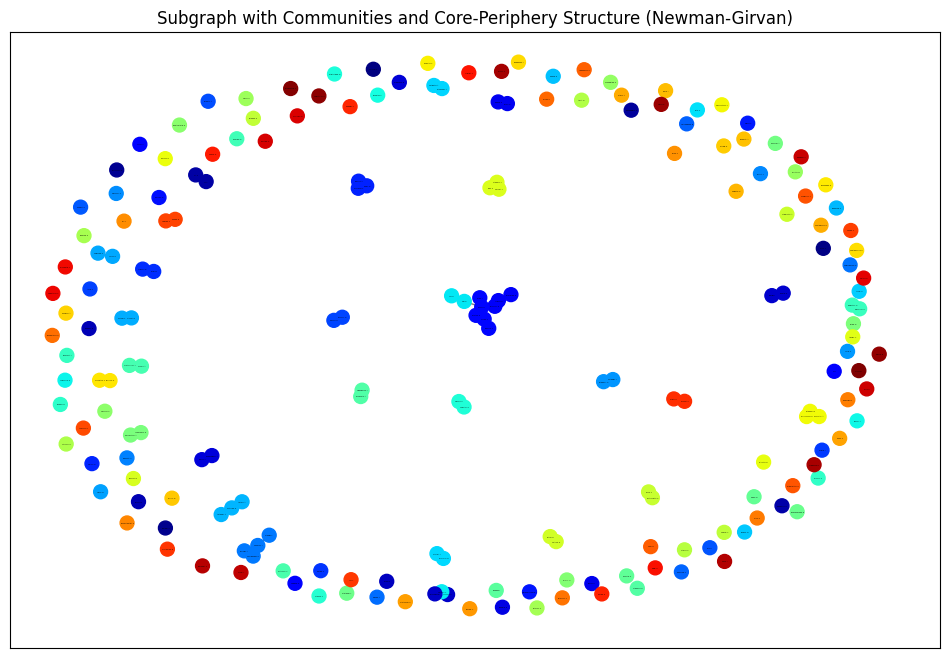

In [ ]:
###Core Periphery Structure identification with degree centrality using Newman Girvan Algorithm (Subgraph)


from networkx.algorithms import community, centrality

# Get the list of nodes
all_nodes = list(data.nodes)

# Set the size of the subset you want
subset_size = 200  # Adjust as needed

# Randomly sample nodes
subset_nodes = random.sample(all_nodes, subset_size)

# Create a subgraph using only the subset of nodes
subgraph = data.subgraph(subset_nodes)

# Apply Newman-Girvan algorithm to the subgraph
communities = list(community.girvan_newman(subgraph))

# Choose a specific level from the hierarchy (e.g., level 2)
level = 2
final_communities = list(communities)[level - 1]

# Create a mapping of node to community
community_map = {node: idx for idx, nodes in enumerate(final_communities) for node in nodes}

# Calculate degree centrality for the subgraph
degree_centrality = centrality.degree_centrality(subgraph)

# Identify core and periphery nodes within each community
core_periphery_structure = {}
for community_id, community in enumerate(final_communities):
    # Identify core nodes based on degree centrality
    core_nodes = {
        node: degree_centrality[node]
        for node in community
    }

    # Identify periphery nodes (remaining nodes in the community)
    periphery_nodes = set(community) - set(core_nodes.keys())

    core_periphery_structure[community_id] = {
        'core_nodes': core_nodes,
        'periphery_nodes': periphery_nodes
    }

# Visualize the subgraph with nodes colored by community
pos = nx.spring_layout(subgraph, seed=42)
node_colors = [community_map[node] for node in subgraph.nodes]

plt.figure(figsize=(12, 8))

# Draw nodes within communities
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=100, cmap=plt.cm.jet)

# Draw edges
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(subgraph, pos, font_size=1)

plt.title('Subgraph with Communities and Core-Periphery Structure (Newman-Girvan)')
plt.show()

# Print Core-Periphery Structure
# for community_id, structure in core_periphery_structure.items():
#     print(f"\nCommunity {community_id + 1}:")
#     print(f"Core Nodes: {structure['core_nodes']}")
#     print(f"Periphery Nodes: {structure['periphery_nodes']}")

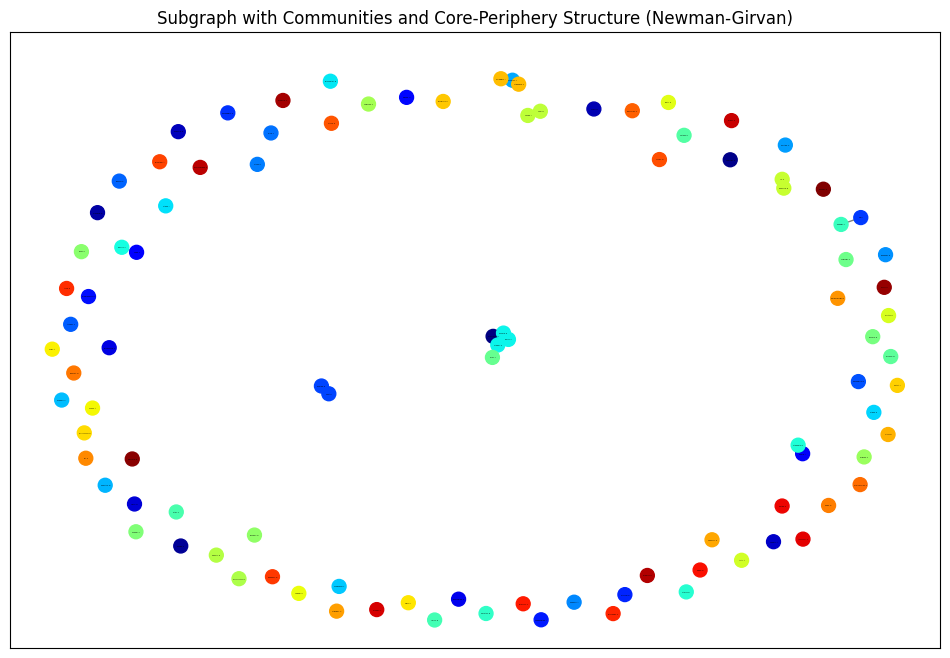

In [17]:
###Core Periphery Structure identification with betweenness centrality using Newman Girvan Algorithm (Subgraph)

import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community, centrality
import networkx as nx
import matplotlib.pyplot as plt

# Get the list of nodes
all_nodes = list(data.nodes)

# Set the size of the subset you want
subset_size = 100  # Adjust as needed

# Randomly sample nodes
subset_nodes = random.sample(all_nodes, subset_size)

# Create a subgraph using only the subset of nodes
subgraph = data.subgraph(subset_nodes)

# Apply Newman-Girvan algorithm to the subgraph
communities = list(community.girvan_newman(subgraph))

# Choose a specific level from the hierarchy
level = 5
final_communities = list(communities)[level - 1]

# Create a mapping of node to community
community_map = {node: idx for idx, nodes in enumerate(final_communities) for node in nodes}

# Calculate betweenness centrality for the subgraph
betweenness_centrality = nx.betweenness_centrality(subgraph)

# Identify core and periphery nodes within each community
core_periphery_structure = {}
for community_id, community in enumerate(final_communities):
    # Identify core nodes based on degree centrality
    core_nodes = {
        node: betweenness_centrality[node]
        for node in community
    }

    # Identify periphery nodes (remaining nodes in the community)
    periphery_nodes = set(community) - set(core_nodes.keys())

    core_periphery_structure[community_id] = {
        'core_nodes': core_nodes,
        'periphery_nodes': periphery_nodes
    }

# Visualize the subgraph with nodes colored by community
pos = nx.spring_layout(subgraph, seed=42)
node_colors = [community_map[node] for node in subgraph.nodes]

plt.figure(figsize=(12, 8))

# Draw nodes within communities
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=100, cmap=plt.cm.jet)

# Draw edges
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(subgraph, pos, font_size=1)

plt.title('Subgraph with Communities and Core-Periphery Structure (Newman-Girvan)')
plt.show()

# Print Core-Periphery Structure
# for community_id, structure in core_periphery_structure.items():
#     print(f"\nCommunity {community_id + 1}:")
#     print(f"Core Nodes: {structure['core_nodes']}")
#     print(f"Periphery Nodes: {structure['periphery_nodes']}")


The identification of Core-Periphery structures within a community structure involves detecting a set of core nodes that are more densely connected among themselves and have weaker connections with the periphery nodes.
Detecting Core-Periphery structures within a community structure identified by the Newman-Girvan algorithm involves analyzing the connectivity patterns of nodes within their communities.

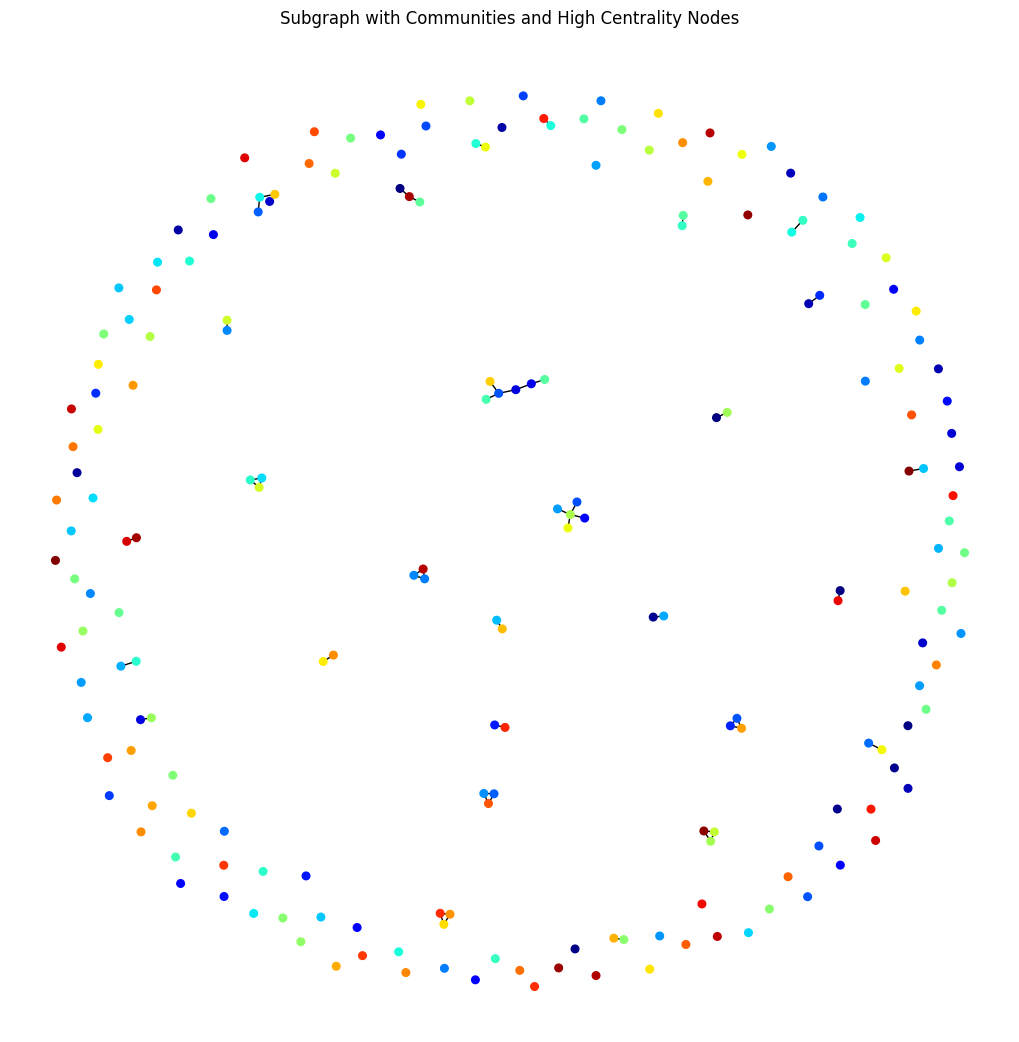

In [16]:
# Centrality measures within and between communities using the Newman-Girvan algorithm subgraph

import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Get the list of nodes
all_nodes = list(data.nodes)

# Set the size of the subset you want
subset_size = 200  # Adjust as needed

# Randomly sample nodes
subset_nodes = random.sample(all_nodes, subset_size)

# Create a subgraph using only the subset of nodes
subgraph = data.subgraph(subset_nodes)

# Apply Newman-Girvan algorithm to the subgraph
communities = list(community.girvan_newman(subgraph))

# Choose a specific level from the hierarchy (e.g., level 2)
level = 2
final_communities = list(communities)[level - 1]

# Calculate degree centrality for the entire subgraph
degree_centrality = nx.degree_centrality(subgraph)

# Calculate degree centrality within each community
local_centrality = {node: degree_centrality[node] for comm in final_communities for node in comm}

# Identify nodes with high degree centrality within communities
threshold = 0.05  # Adjust as needed
high_local_centrality_nodes = [node for node, centrality in local_centrality.items() if centrality > threshold]

# Identify nodes with high betweenness centrality (acting as bridges between communities)
betweenness_centrality = nx.betweenness_centrality(subgraph)
high_betweenness_nodes = [node for node, centrality in betweenness_centrality.items() if centrality > threshold]

# Visualize the subgraph with nodes colored by community and highlighting high centrality nodes
pos = nx.spring_layout(subgraph)
node_colors = [i for i, comm in enumerate(final_communities) for _ in comm]
node_sizes = [100 if node in high_local_centrality_nodes else 30 for node in subgraph.nodes]

plt.figure(figsize=(10, 10))
nx.draw(subgraph, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.jet, node_size=node_sizes)
plt.title("Subgraph with Communities and High Centrality Nodes")
plt.show()

# # Print nodes with high degree centrality within communities
# print("Nodes with High Degree Centrality within Communities:")
# for node, centrality in local_centrality.items():
#     if node in high_local_centrality_nodes:
#         print(f"{node}: {centrality}")

# # Print nodes with high betweenness centrality
# print("\nNodes with High Betweenness Centrality:")
# for node, centrality in betweenness_centrality.items():
#     if node in high_betweenness_nodes:
#         print(f"{node}: {centrality}")


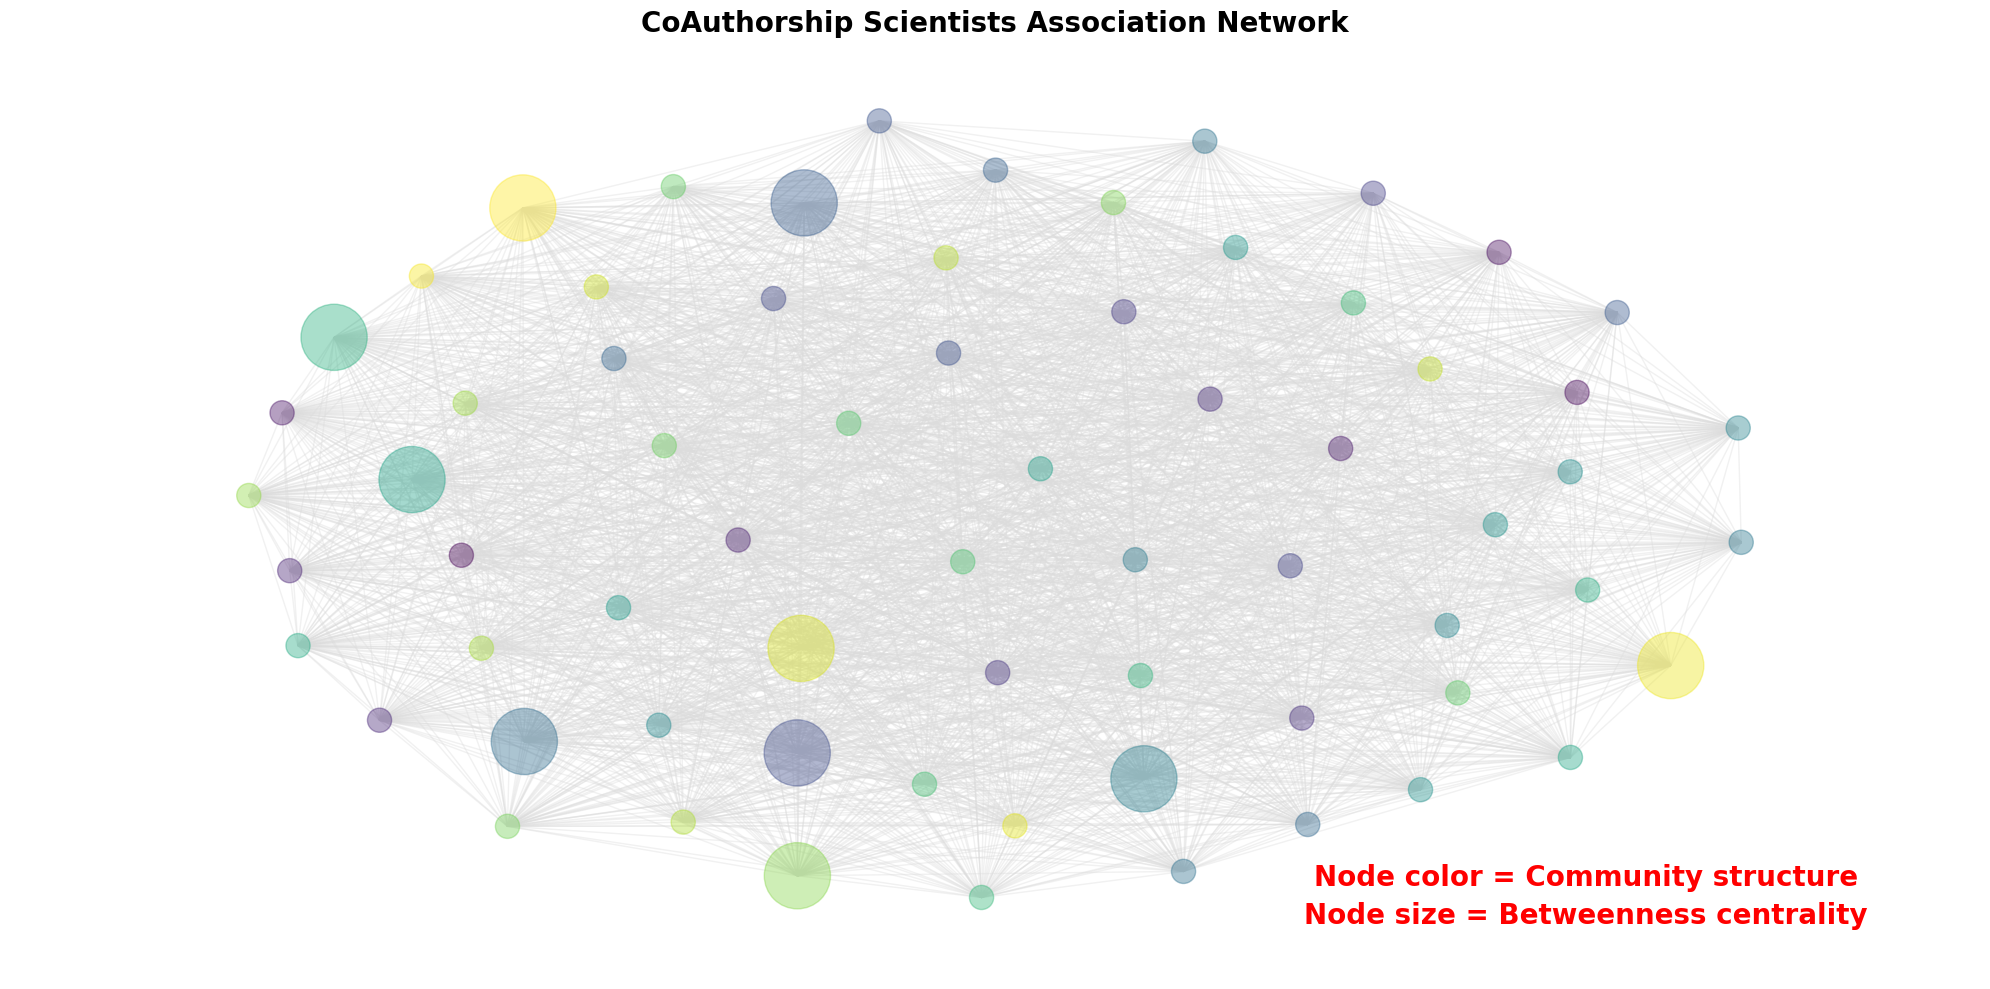

In [31]:
#Betweeness Centrality from Newman Girvan Algorithm

#data
scientists = list(data.nodes)

# Choose a random subset of scientists for visualization
num_scientists_to_visualize = min(200, len(scientists))
selected_scientists = random.sample(scientists, num_scientists_to_visualize)

# Create a fully connected graph for the selected scientists
G = nx.complete_graph(len(selected_scientists))

# Set node names
mapping = {i: scientist for i, scientist in enumerate(selected_scientists)}
G = nx.relabel_nodes(G, mapping)

# Remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# Remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# Detect community structure using Newman-Girvan algorithm
communities = list(nx.community.girvan_newman(G))
final_communities = list(communities)[-1]
community_index = {n: i for i, com in enumerate(final_communities) for n in com}

# Compute betweenness centrality
centrality = nx.betweenness_centrality(G, k=10, endpoints=True)

# Draw the graph
fig, ax = plt.subplots(figsize=(20, 10))
pos = nx.spring_layout(G, k=0.15, seed=4572321)

node_color = [community_index[n] for n in G]
node_size = [v * 20000 for v in centrality.values()]

nx.draw_networkx(
    G,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("CoAuthorship Scientists Association Network", font)

# Change font color for legend
font["color"] = "r"
ax.text(
    0.80,
    0.10,
    "Node color = Community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "Node size = Betweenness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()
